# **Anomaly Detection**

* Anomaly detection is the process of detecting outliers
* Anomaly detection is a unsupervised technique

The role or importance of outlier is based on the problem statement, that we are working on.

Techniques used in anomaly detection

* Isolation Forest
* DBScan
* Local outlier factor

## **Isolation Forest**

In [67]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

In [68]:
# generating data
X, y = make_blobs(
    n_samples=300,
    centers=2,
    cluster_std=1,
    random_state=42
)

In [69]:
# adding some anomalies
n_outliers = 20
outliers = np.random.uniform(low=-10, high=10, size=(n_outliers, 2))

In [70]:
X_total = np.vstack([X, outliers])

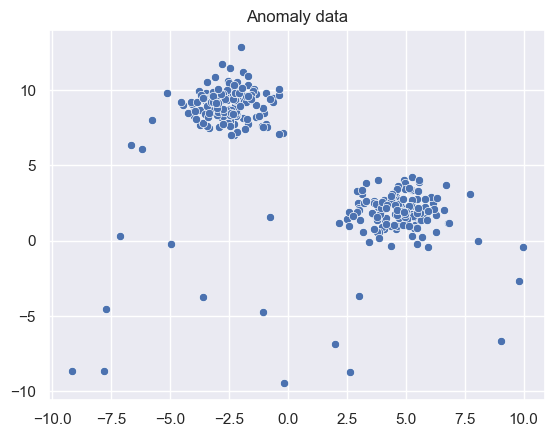

In [71]:
# plotting
sns.set_theme(style='darkgrid')
sns.scatterplot(x=X_total[:, 0], y=X_total[:, 1])
plt.title("Anomaly data")
plt.show()

In [72]:
# training the isolation forest

iso = IsolationForest(
    contamination=n_outliers/len(X_total),
    random_state=42
)
y_pred = iso.fit_predict(X_total)

In [73]:
# observing the predicted data
import pandas as pd

print(f"Sample preditions:\n{y_pred[:10]}")
predictions = pd.Series(y_pred)
print("\ncounts:\n", predictions.value_counts())

Sample preditions:
[1 1 1 1 1 1 1 1 1 1]

counts:
  1    300
-1     20
Name: count, dtype: int64


In [74]:
anomalies = X_total[y_pred == -1]
normals = X_total[y_pred == 1]

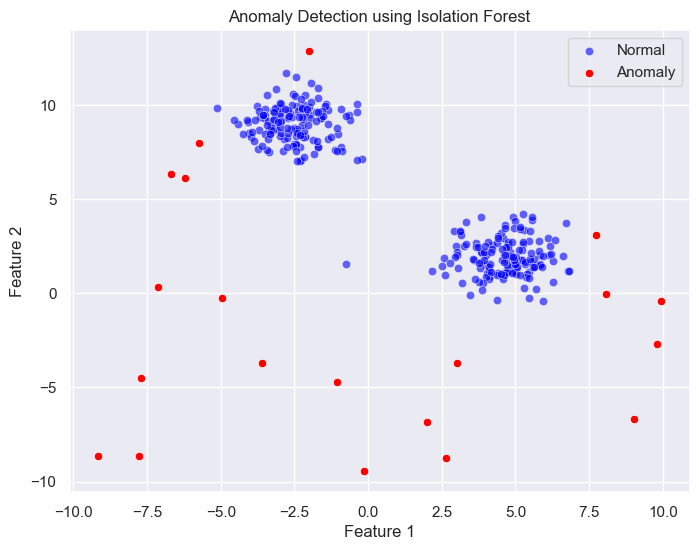

In [76]:
# visualization

plt.figure(figsize=(8, 6))
sns.scatterplot(x=normals[:, 0], y=normals[:, 1], c='blue', label='Normal', alpha=0.6)
sns.scatterplot(x=anomalies[:, 0], y=anomalies[:, 1], c='red', label = 'Anomaly')
plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [21]:
# anomaly scores

scores = iso.decision_function(X_total)
print("First 10 anomaly scores:\n", scores[:10])

First 10 anomaly scores:
 [0.17942705 0.10212151 0.14512731 0.18051588 0.08439158 0.10444722
 0.14812143 0.09760919 0.15016997 0.09734783]


In [23]:
# quick evaluation

print("Number of anomalies detected:", (y_pred == -1).sum())
print("Expected anomalies:", n_outliers)

Number of anomalies detected: 20
Expected anomalies: 20


## **DBscan**

In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

In [42]:
# data generation

X, y = make_circles(
    n_samples=400,
    factor=0.1,
    noise=0.09
)

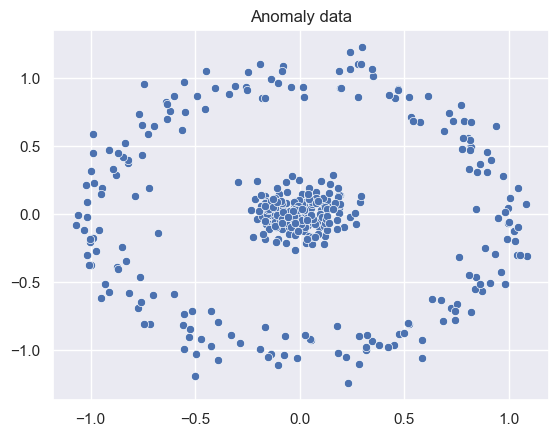

In [43]:
# plotting the data
sns.set_theme(style='darkgrid')
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.title("Anomaly data")
plt.show()

In [63]:
# dbscan training
db = DBSCAN(eps=0.15, min_samples=5)
y_pred = db.fit_predict(X)

In [64]:
anomalies = X[y_pred == -1]
normals = X[y_pred != -1]

<Figure size 800x600 with 0 Axes>

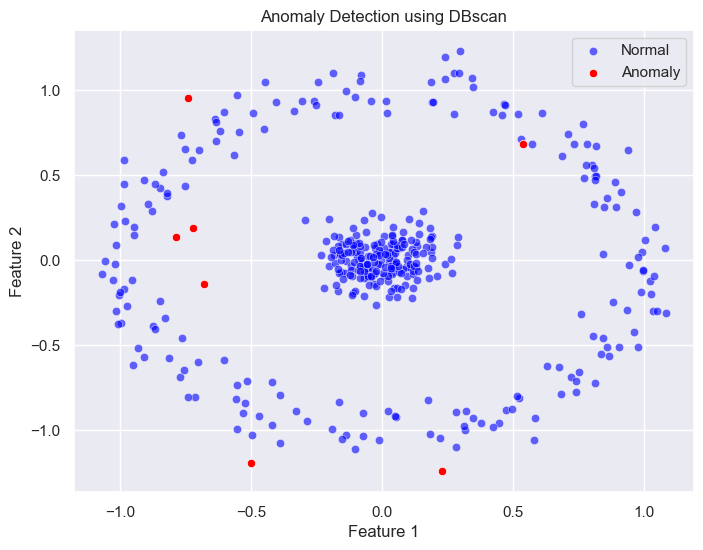

In [65]:
# visualization

plt.figure(figsize=(8, 6))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=normals[:, 0], y=normals[:, 1], c='blue', label='Normal', alpha=0.6)
sns.scatterplot(x=anomalies[:, 0], y=anomalies[:, 1], c='red', label = 'Anomaly', markers='x')
plt.title("Anomaly Detection using DBscan")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [66]:
print(f"Number of anomalies detected: {(y_pred == -1).sum()}")

Number of anomalies detected: 7


## **Local Outlier Factor**

In [77]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import LocalOutlierFactor

In [82]:
# generating data
X, y = make_blobs(
    n_samples=300,
    centers=2,
    cluster_std=1.0,
    random_state=48
)

In [83]:
n_outliers = 20
outliers = np.random.uniform(low=-10, high=10, size=(n_outliers, 2))

X_total = np.vstack([X, outliers])

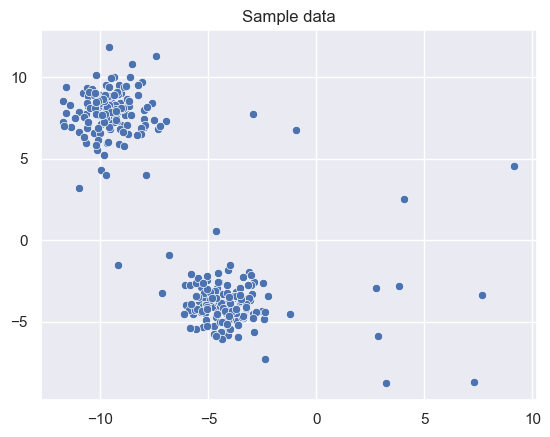

In [84]:
# plotting

sns.scatterplot(x=X_total[:, 0], y=X_total[:, 1])
plt.title("Sample data")
plt.show()

In [88]:
# Local Outlier Factor training

lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.07
)
y_pred = lof.fit_predict(X_total)

In [89]:
anomalies = X_total[y_pred == -1]
normals = X_total[y_pred == 1]

<Figure size 800x600 with 0 Axes>

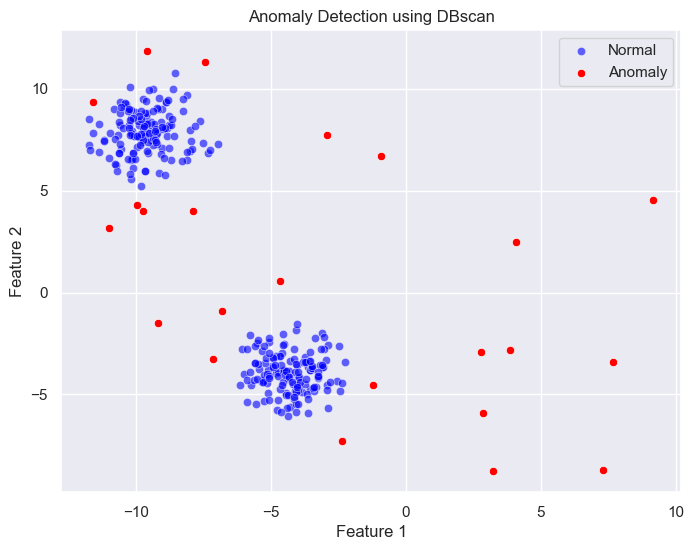

In [90]:
# visualization

plt.figure(figsize=(8, 6))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=normals[:, 0], y=normals[:, 1], c='blue', label='Normal', alpha=0.6)
sns.scatterplot(x=anomalies[:, 0], y=anomalies[:, 1], c='red', label = 'Anomaly', markers='x')
plt.title("Anomaly Detection using DBscan")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [92]:
# evaluation

print(f"Number of anomalies detected: {(y_pred == -1).sum()}")
print(f"Number of original outliers: {n_outliers}")

Number of anomalies detected: 23
Number of original outliers: 20
